In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
path="/lustre/ytzheng/"
# path="C:/data/SAM_cases/"
Casename = 'ASTEX_cold2.6'
Casename1 = 'ASTEX_warm2.6'

f = xr.open_mfdataset(path + Casename + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
z = f['z']/1000.

myfontsize = 12

In [4]:
def pltprf(ax, var1, var2, z1, z2, zcb1, zcb2, zct1, zct2,
           xlim,
           xlabel = ' ', ylabel = ' '):
    
    ax.plot(var1, z, linewidth=2, label = 'CADV', color = 'dodgerblue')
    ax.plot(var2, z1, linewidth=2, label = 'WADV', color = 'crimson')
        
    ax.fill_between(xlim, [zcb1, zcb1], [zct1, zct1], color='dodgerblue', alpha=.3)
    ax.fill_between(xlim, [zcb2, zcb2], [zct2, zct2], color='crimson', alpha=.3)
    
    ax.set_ylabel(ylabel, fontsize=myfontsize) 
    ax.set_xlabel(xlabel, fontsize=myfontsize) 
    
    ax.set_ylim([0., 1.5])
    ax.set_xlim(xlim)
    
    ax.grid(True)

In [5]:
f

<xarray.Dataset>
Dimensions:               (time: 90, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 168.72917
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(90,), meta=np.ndarray>
    PREC                  (time) float32 dask.array<chunksize=(90,), me

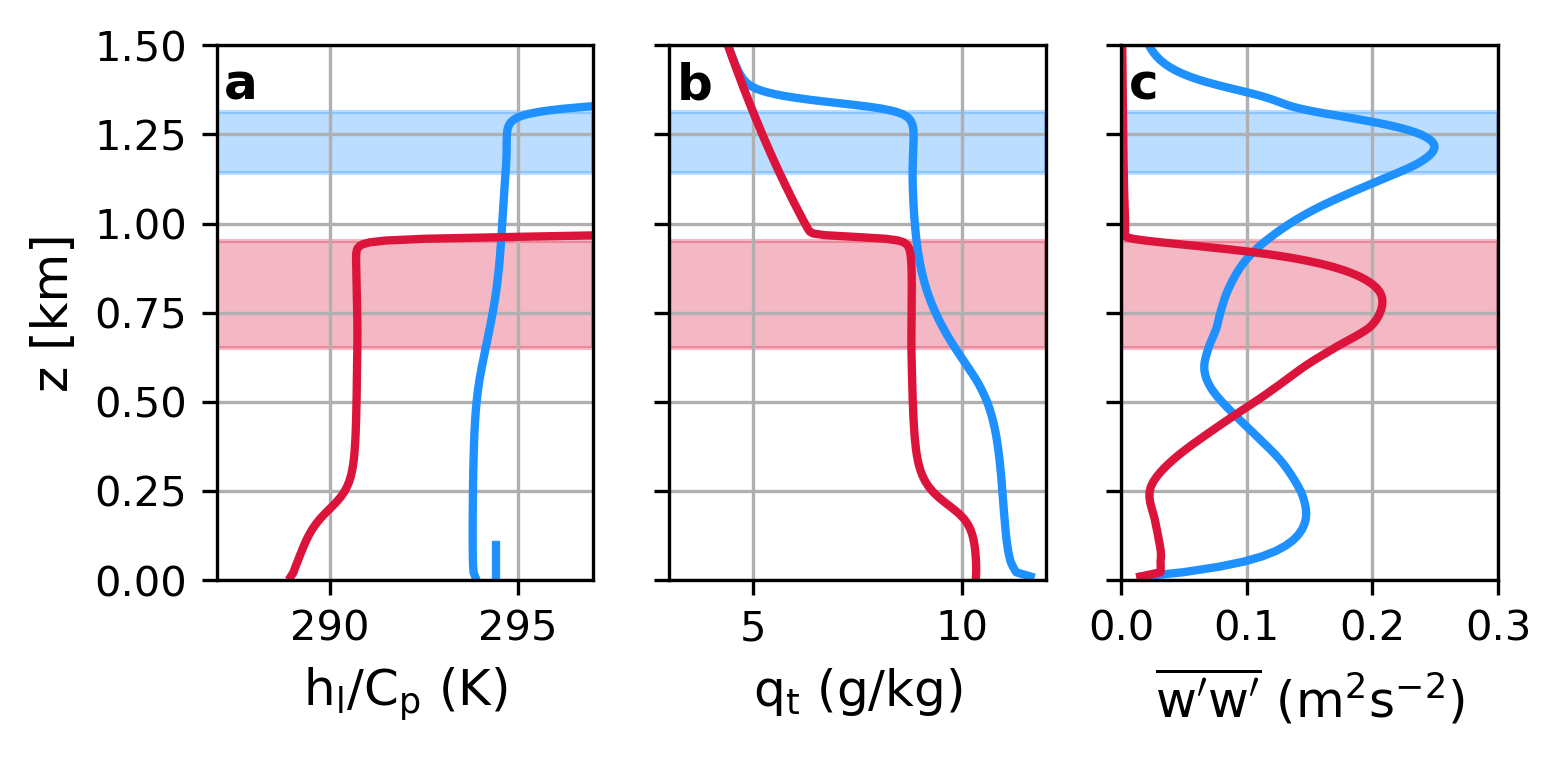

In [7]:
ind = 30

fig, axs = plt.subplots(ncols = 3,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (6)/2.54), dpi = 300)

pltprf(axs[0], f['TL'][ind], f1['TL'][ind], z, z, 
       f['zcb'][ind]/1000., f1['zcb'][ind]/1000.,
       f['zct'][ind]/1000., f1['zct'][ind]/1000.,
       [287, 297],
       xlabel = r"$\mathrm{h_l/C_p \ (K)}$", ylabel = 'z [km]')

axs[0].plot([f['SST'][ind], f['SST'][ind]], [0,0.1], linewidth=2, color = 'dodgerblue')

pltprf(axs[1], f['QT'][ind], f1['QT'][ind], z, z, 
       f['zcb'][ind]/1000., f1['zcb'][ind]/1000.,
       f['zct'][ind]/1000., f1['zct'][ind]/1000.,
       [3, 12],
       xlabel = r"$\mathrm{q_t \ (g/kg)}$")

pltprf(axs[2], f['W2'][ind], f1['W2'][ind], z, z, 
       f['zcb'][ind]/1000., f1['zcb'][ind]/1000.,
       f['zct'][ind]/1000., f1['zct'][ind]/1000.,
       [0, 0.3],
       xlabel = r"$\mathrm{\overline{w^{\prime}w^{\prime}} \ (m^2s^{-2})}$")

for i, label in enumerate(('a', 'b', 'c')):
    axs[i].text(0.02, 0.9, label, transform=axs[i].transAxes,
                fontsize=myfontsize, fontweight='bold')
    
fig.savefig('plot_result_profiles_30h.png', dpi=fig.dpi, bbox_inches='tight')

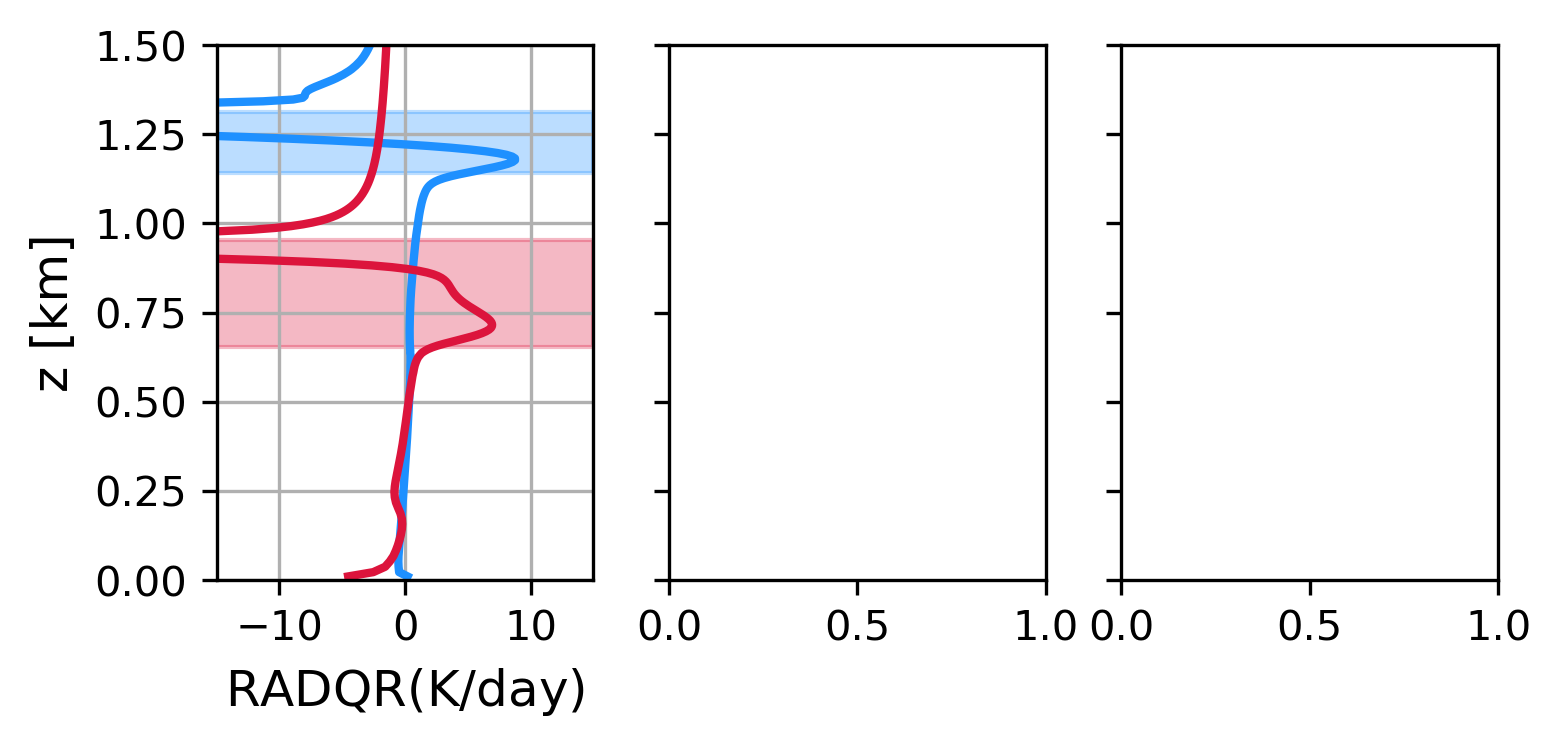

In [20]:
ind = 30

fig, axs = plt.subplots(ncols = 3,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (6)/2.54), dpi = 300)

pltprf(axs[0], f['RADQR'][ind], f1['RADQR'][ind], z, z, 
       f['zcb'][ind]/1000., f1['zcb'][ind]/1000.,
       f['zct'][ind]/1000., f1['zct'][ind]/1000.,
       [-15, 15],
       xlabel = r"$\mathrm{RADQR (K/day)}$", ylabel = 'z [km]')

In [7]:
f['RADQR'][ind].values

array([ 2.00879812e-01, -4.71313715e-01, -5.14152765e-01, -5.31341076e-01,
       -5.19241691e-01, -4.83570963e-01, -4.56101865e-01, -4.21133637e-01,
       -3.87253433e-01, -3.51473987e-01, -3.15970808e-01, -2.78884172e-01,
       -2.43154004e-01, -2.16340184e-01, -1.86714873e-01, -1.56188548e-01,
       -1.26228020e-01, -9.55206454e-02, -6.30423203e-02, -3.26536112e-02,
       -9.31597315e-03,  1.78684499e-02,  4.55846079e-02,  7.39026889e-02,
        1.01800673e-01,  1.32908329e-01,  1.61364928e-01,  1.85683817e-01,
        2.11320177e-01,  2.37095982e-01,  2.61880785e-01,  2.88381726e-01,
        3.16014916e-01,  3.39689612e-01,  3.52379292e-01,  3.79762858e-01,
        4.00723130e-01,  4.15976375e-01,  4.15528834e-01,  4.30848241e-01,
        4.28130746e-01,  4.31141168e-01,  4.40034539e-01,  4.37354535e-01,
        4.28590477e-01,  4.38081175e-01,  4.10439909e-01,  4.18023080e-01,
        4.01061565e-01,  3.92017335e-01,  3.86481613e-01,  3.81974250e-01,
        3.77515316e-01,  